# Revisão de conceitos estatísticos II

Vamos explorar alguns conceitos estatísticos aplicados à análise de sinais.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
from scipy.stats import norm
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd

# Distribuição de probabilidade de uma VA discreta

A distribuição de probabilidade de uma VA discreta é caracterizada pelas probabilidades de $x$(valores individuais) ser igual a $x_{i}$ (valor escolhido) para cada valor possível.

Consideremos o lançamento de uma dado de 6 façes não viciado. O universo amostral é:

$\Omega = {1, 2, 3, 4, 5, 6}$,
com 6 elementos.

A distribuição de probabilidade é dada por:

\begin{equation}
p(x=x_i) = \frac{1}{6}
\end{equation}

C:\Users\Cliente\AppData\Local\Temp\ipykernel_17412\2499221513.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(1,7), (1/6)*np.ones(6), '-b', markerfmt = 'ob', basefmt=" ", use_line_collection=  True)


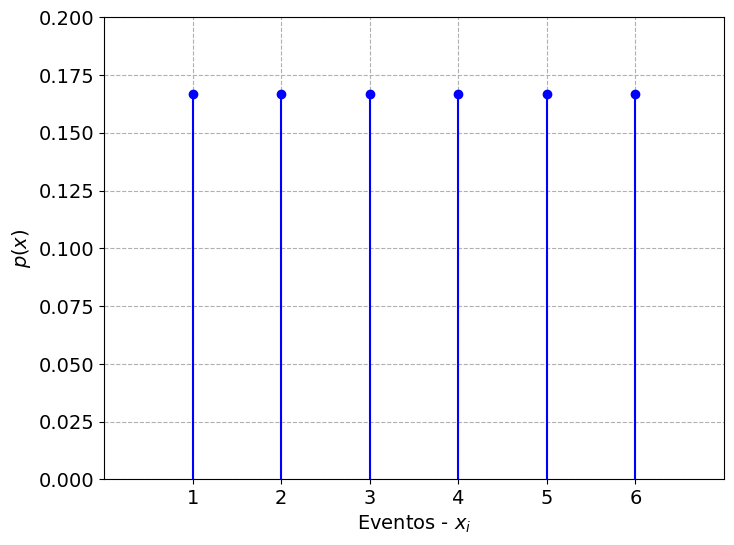

In [2]:
plt.figure(figsize = (8,6))
plt.stem(np.arange(1,7), (1/6)*np.ones(6), '-b', markerfmt = 'ob', basefmt=" ", use_line_collection=  True)
plt.xticks(np.arange(1,7))
#plt.xticks(np.arange(1,7))
plt.grid(linestyle = '--', which='both')
plt.xlabel(r'Eventos - $x_i$')
plt.ylabel(r'$p(x)$')
plt.xlim((0, 7))
plt.ylim((0, 1/5));

# Distribuição cumulativa de probabilidade de uma VA discreta

A distribuição cumulativa especifica a probabilidade de $x \leq x_{i}$.


\begin{equation}
F(x) = P(x \leq x_i)
\end{equation}


Consideremos o lançamento do dado não viciado do exemplo anterior. Dentro do universo amostral ($\Omega = {1, 2, 3, 4, 5, 6}$, com 6 elementos), a probabilidade de obtermos um número $\leq 4$ ($\Omega = {1, 2, 3,}$) é $F(4) = P(x \leq 4) = 4/6 = 2/3$


C:\Users\Cliente\AppData\Local\Temp\ipykernel_17412\2330279199.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, Fx, '-b', markerfmt = 'ob', basefmt=" ", use_line_collection=  True)


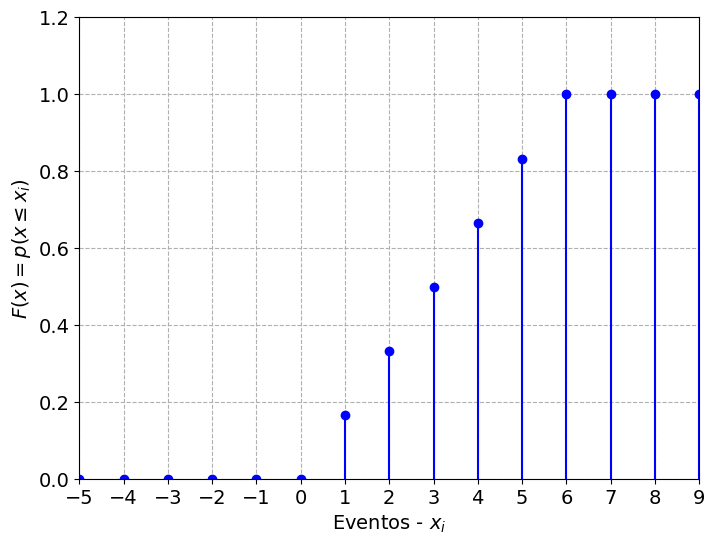

In [3]:
n = np.arange(-5, 10)
Fx = (1/6)*n
Fx[n<1] = 0
Fx[n>6] = 1

plt.figure(figsize = (8,6))
plt.stem(n, Fx, '-b', markerfmt = 'ob', basefmt=" ", use_line_collection=  True)
plt.xticks(n)
#plt.xticks(np.arange(1,7))
plt.grid(linestyle = '--', which='both')
plt.xlabel(r'Eventos - $x_i$')
plt.ylabel(r'$F(x) = p(x \leq x_i)$')
plt.xlim((n[0], n[-1]))
plt.ylim((0, 1.2));

# Distribuição cumulativa de probabilidade de uma VA contínua

A distribuição cumulativa especifica a probabilidade de $x \leq x_{i}$.


\begin{equation}
F(x) = P(x \leq x_i)
\end{equation}

As propriedades da distribuição cumulativa são:

- $F(-\infty)=0$ 
- $F(+\infty)=1$
- $F(x_{2}) \geq  F(x_{1})$, se $x_{2}\geq x_{1}$

Tomando a última propriedade, podemos definir a densidade de probabilidade por:

\begin{equation}
p(x) = \frac{\mathrm{d}F(x)}{\mathrm{d} x},
\end{equation}
que nos dá a probabilidade de encontrar o valor $x$ num intervalo infinitesimal.

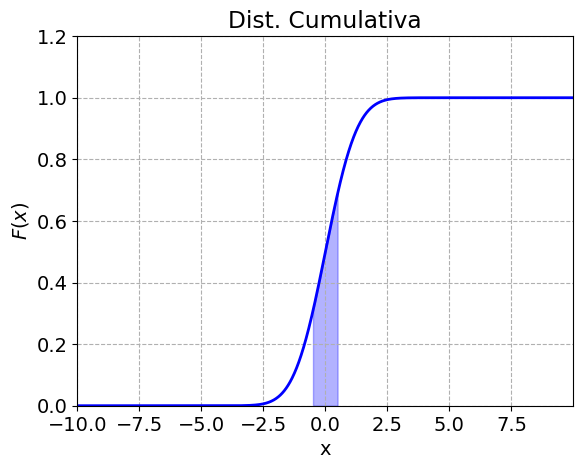

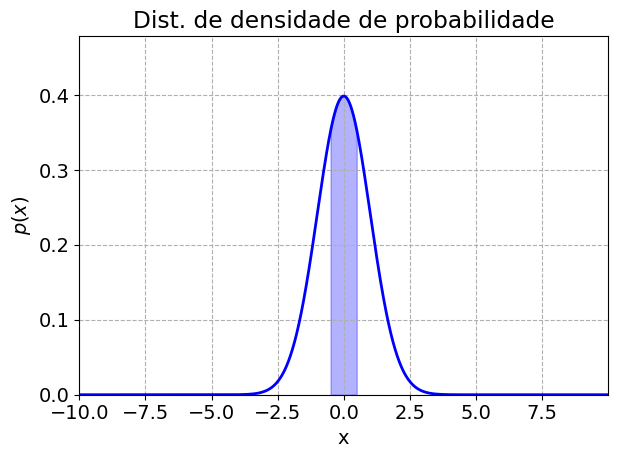

In [11]:
# parâmetros de uma distribuição normal
mu_x = 0
sigma_x = 1

# A distribuição cumulativa e a densidade de probabilidade
x = np.arange(-10, 10, 0.01)
Fx = norm.cdf(x, loc= mu_x, scale = sigma_x)
px = norm.pdf(x, loc= mu_x, scale = sigma_x)

# A relação entre F(x) e p(x)
x_1 = -0.5
x_2 = 0.5
x_section = np.arange(x_1, x_2, 0.01)

# plots
plt.figure()
plt.plot(x, Fx, color = 'b', linewidth = 2)
plt.fill_between(x_section, norm.cdf(x_section, loc= mu_x, scale = sigma_x), color = 'blue', alpha = 0.3)
plt.grid(linestyle = '--', which='both')
plt.title('Dist. Cumulativa')
plt.xlabel('x')
plt.ylabel(r'$F(x)$')
plt.xlim((x[0], x[-1]))
plt.ylim((0, 1.2))

plt.figure()
plt.plot(x, px, color = 'b', linewidth = 2)
plt.fill_between(x_section, norm.pdf(x_section, loc= mu_x, scale = sigma_x), color = 'blue', alpha = 0.3)
plt.grid(linestyle = '--', which='both')
plt.title('Dist. de densidade de probabilidade')
plt.xlabel('x')
plt.ylabel(r'$p(x)$')
plt.xlim((x[0], x[-1]))
plt.ylim((0, 1.2*np.amax(px)))
plt.tight_layout();

# Ruído aleatório com distribuição normal

Neste exemplo nós consideramos um sinal gerado a partir do processo de obter amostras de uma distribuição normal, dada por:

\begin{equation}
p(x) = \mathcal{N}(\mu_x, \sigma_x) = \frac{1}{\sqrt{2\pi}\sigma_x}\mathrm{e}^{-\frac{1}{2\sigma_x^2}(x-\mu_x)^2}
\end{equation}
em que $\mu_x$ é a média e $\sigma_{x}$ é o desvio padrão.

Imaginemos então, que a cada instante de tempo $t$, nós sorteamos um valor da distribuição normal.

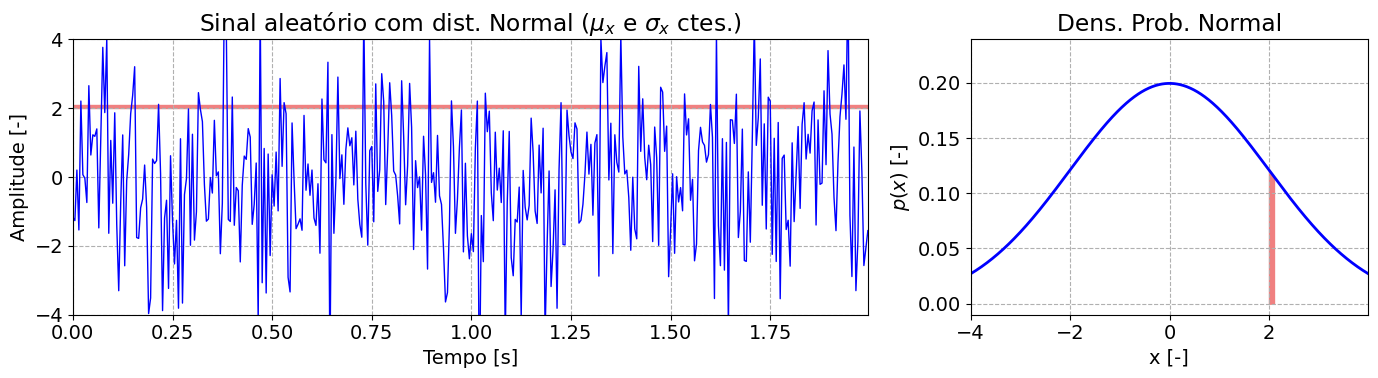

In [15]:
fs = 200
time = np.arange(0,2, 1/fs)

# sinal
mu_x = 0
sigma_x = 2.0
xt = np.random.normal(loc = mu_x, scale = sigma_x, size=len(time))

# A distribuição cumulativa e a densidade de probabilidade
x = np.arange(-4, 4, 0.01)
Fx = norm.cdf(x, loc= mu_x, scale = sigma_x)
px = norm.pdf(x, loc= mu_x, scale = sigma_x)

# Sombreando suas probabilidades
x_1 = 2
x_2 = 2.1
x_section = np.arange(x_1, x_2, 0.01)


# Figura
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [8, 4]}, figsize = (14, 4))
axs[0].plot(time, xt, '-b', linewidth = 1)
axs[0].fill_between(time, x_1, x_2,  color = 'lightcoral', alpha = 1)
axs[0].set_title(r'Sinal aleatório com dist. Normal ($\mu_x$ e $\sigma_x$ ctes.)')
axs[0].grid(linestyle = '--', which='both')
axs[0].set_xlabel('Tempo [s]')
axs[0].set_ylabel('Amplitude [-]')
axs[0].set_xlim((0, time[-1]))
axs[0].set_ylim((-4, 4))

axs[1].plot(x, px, color = 'b', linewidth = 2)
axs[1].fill_between(x_section, norm.pdf(x_section, loc= mu_x, scale = sigma_x),  color = 'lightcoral', alpha = 1)
axs[1].set_title(r'Dens. Prob. Normal')
axs[1].grid(linestyle = '--', which='both')
axs[1].set_ylabel(r'$p(x)$ [-]')
axs[1].set_xlabel(r'x [-]')
axs[1].set_xlim((x[0], x[-1]))
axs[1].set_ylim((-0.01, 1.2*np.amax(px)))
plt.tight_layout()

